In [1]:
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [2]:
# %run get_data.ipynb

In [3]:
TODAY = date.today().strftime('%Y-%m-%d')
TODAY

'2025-06-17'

In [4]:
cap_df = pd.read_csv('data/top_cap.csv')
cap_df

,symbol,name,cap
0,BTCUSDT,Bitcoin,2073753868939
1,ETHUSDT,Ethereum,301169035852
2,USDTUSDT,Tether,155484740244
3,XRPUSDT,XRP,128239232063
4,BNBUSDT,BNB,94164517046
...,...,...,...
95,PYUSDUSDT,PayPal USD,944502283
96,XDCUSDT,XDC Network,941041134
97,STXUSDT,Stacks,937506041
98,METHUSDT,Mantle Staked Ether,932556985


In [5]:
df = pd.read_csv('data/data.csv')
df_vol = df[['timestamp', 'symbol', 'volume']].copy()

df_vol = df_vol.pivot(index='timestamp', columns='symbol', values='volume')
df_vol = df_vol.dropna(axis=1, how='any')
df_vol

symbol,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TAOUSDT,TIAUSDT,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-17,219108.907,124025287.9,52171685.0,3210100.66,71645844.2,2073491.21,1975971.78,54034.759,235509.028,2.707549e+12,...,79117.4225,4508802.62,3.649987e+08,4786464.14,8.375384e+08,257276969.9,47.45055,21100848.9,93161043.0,584945066.0
2024-06-18,206525.532,215871708.0,93014314.0,7835005.14,139620076.2,4139698.27,2809030.18,112632.025,459142.573,3.193036e+12,...,141537.0087,7181831.54,3.886020e+08,4229131.74,9.716921e+08,667247272.3,38.28608,33818682.8,158977283.0,582727016.0
2024-06-19,171294.938,84821749.0,38817456.0,2789491.51,61941547.6,1541986.51,1296859.97,35558.051,260529.062,1.827068e+12,...,88913.5781,4167062.76,2.538853e+08,4568679.79,5.867947e+08,221969330.3,46.95684,14441249.9,43482913.0,260612342.0
2024-06-20,112438.197,81788373.7,39426930.0,4546601.49,66633976.3,1513490.07,1873349.75,40354.251,289498.772,1.990560e+12,...,62661.6006,3862780.70,1.936539e+08,2175718.70,7.005201e+08,181286297.3,49.32038,28856681.2,40734842.0,324974220.0
2024-06-21,138234.740,77104500.3,38374490.0,3690494.89,60507034.2,1200186.36,1411878.18,46883.277,191182.614,2.348349e+12,...,58582.4097,3528143.52,2.933486e+08,2417601.67,9.620607e+08,240684508.3,41.76935,17924886.2,63902601.0,336098409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-13,529097.909,180308681.7,82148892.0,6834678.98,144835916.6,2528137.46,5203353.31,91918.580,223303.917,2.361962e+12,...,134084.2308,16043561.98,5.627748e+08,21627948.35,1.863984e+09,449599101.3,93.03717,56759569.6,101403507.0,171924272.9
2025-06-14,166336.995,57750191.8,24120411.0,2428687.95,50905874.8,920527.91,1096166.12,34424.810,93690.143,6.012466e+11,...,44005.8886,4458378.44,1.627638e+08,5833384.80,3.921939e+08,132838960.1,62.01518,13782210.3,25309710.0,67644610.7
2025-06-15,98219.224,44666279.5,22414180.0,2474883.89,60734814.2,891381.76,1025408.30,75780.609,79324.646,8.434405e+11,...,44571.2525,5708376.81,1.557125e+08,5834362.72,5.044200e+08,129454002.0,55.75567,11827761.2,21441243.0,46595619.5


In [6]:
df = df[['timestamp', 'symbol', 'close']]

df = df.pivot(index='timestamp', columns='symbol', values='close')
df = df.dropna(axis=1, how='any')

In [7]:
df

symbol,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TAOUSDT,TIAUSDT,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-17,84.94,0.4013,0.1451,7.450,0.8579,6.997,28.47,419.7,604.30,0.000023,...,288.5,7.260,0.11678,10.610,1.0004,0.02738,66433.16,3.027,0.0969,0.5047
2024-06-18,82.05,0.3837,0.1338,6.830,0.7948,6.688,26.60,389.2,588.60,0.000021,...,293.6,6.410,0.11544,9.766,1.0004,0.02552,65146.10,2.826,0.0914,0.4910
2024-06-19,87.31,0.3844,0.1387,6.910,0.8129,6.894,26.94,388.9,599.30,0.000021,...,299.5,6.530,0.11582,9.954,1.0003,0.02604,65090.91,2.797,0.0934,0.4933
2024-06-20,84.85,0.3844,0.1382,6.910,0.8014,6.837,27.58,389.8,587.70,0.000021,...,299.1,6.370,0.11679,10.029,1.0006,0.02673,64834.68,3.033,0.0939,0.4888
2024-06-21,82.00,0.3760,0.1393,6.940,0.8022,6.787,27.48,383.0,586.10,0.000020,...,286.2,6.410,0.11835,9.810,1.0005,0.02614,64143.13,2.981,0.0920,0.4889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-13,291.17,0.6420,0.1808,4.497,0.3487,4.131,19.41,448.7,655.35,0.000015,...,375.5,1.804,0.26970,7.759,0.9994,0.02260,106027.39,1.004,0.2608,2.1472
2025-06-14,275.11,0.6247,0.1771,4.459,0.3333,4.087,18.93,430.9,645.61,0.000015,...,363.5,1.793,0.27110,7.302,0.9994,0.02206,105399.14,0.975,0.2564,2.1394
2025-06-15,274.97,0.6334,0.1766,4.538,0.3278,4.093,19.10,460.4,648.19,0.000015,...,367.1,1.757,0.27390,7.180,0.9997,0.02226,105570.71,0.980,0.2587,2.1655


# Solver

In [8]:
def find_optimal_parameters(df, symbol_list=None, 
                            min_last_days=30, max_last_days=100, step_day=5,
                            min_procent=0.01, max_procent=0.5, step_procent=0.05,
                            min_std_procent=0.01, max_std_procent=0.3, step_std=0.01):
    results = {}

    if symbol_list is None:
        symbol_list = df.columns.tolist()

    for symbol in tqdm(symbol_list, desc='Processing Symbols'):
        optimal_procent = max_procent
        optimal_last_days = min_last_days
        optimal_std_procent = max_std_procent

        for last_days in range(min_last_days, max_last_days + 1, step_day):
            df_slice = df[symbol].iloc[-last_days:]
            mean_val = df_slice.mean()
            df_warning_100 = df[symbol].iloc[-100:]
            df_warning_30 = df[symbol].iloc[-30:]

            for std_procent in np.arange(max_std_procent, min_std_procent, -step_std):
                std_n = mean_val * std_procent

                for procent in np.arange(max_procent, min_procent, -step_procent):
                    min_historical = df[symbol].min() * (procent + 1.0)
                    min_support_100 = df_warning_100.min() * (procent + 1.0)
                    min_support_30 = df_warning_30.min() * (procent + 1.0)
                    max_historical = df[symbol].max()
                    max_resist_100 = df_warning_100.max()
                    max_resist_30 = df_warning_30.max()

                    if df_slice.std() <= std_n and mean_val <= min_historical:
                        if (procent < optimal_procent or
                            (procent == optimal_procent and last_days > optimal_last_days) or
                            (procent == optimal_procent and last_days == optimal_last_days and std_procent < optimal_std_procent)):
                            optimal_procent = procent
                            optimal_last_days = last_days
                            optimal_std_procent = std_procent

        last_price = df[symbol].iloc[-1]

        if symbol != 'BTCUSDT':
            if (optimal_procent == max_procent) & (optimal_last_days == min_last_days) & (optimal_std_procent == max_std_procent):
                continue

        results[symbol] = (optimal_procent, optimal_last_days, optimal_std_procent, 
                           min_support_100, min_support_30, min_historical, 
                           max_historical, max_resist_100, max_resist_30, 
                           last_price)

    results = pd.DataFrame(results).T
    results.columns = ['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent', 
                       'Min Support 100', 'Min Support 30', 'Min Historical', 
                       'Max Historical', 'Max Resist 100', 'Max Resist 30', 
                       'Last Price']
    results = results.sort_values(by=['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent'], 
                                    ascending=[True, False, False])

    return results

In [9]:
optimal_symbol = find_optimal_parameters(df, symbol_list=None,
                                         min_last_days=90, max_last_days=100, step_day=5,
                                         min_procent=0.01, max_procent=0.3, step_procent=0.01,
                                         min_std_procent=0.01, max_std_procent=0.3, step_std=0.01)

Processing Symbols: 100%|██████████| 44/44 [00:05<00:00,  7.47it/s]


In [10]:
ignore_symbols = ['USDCUSDT', 'FDUSDUSDT']
optimal_symbol = optimal_symbol[~optimal_symbol.index.isin(ignore_symbols)]

In [11]:
optimal_symbol

,Optimal Procent,Optimal Last Days,Optimal Std Procent,Min Support 100,Min Support 30,Min Historical,Max Historical,Max Resist 100,Max Resist 30,Last Price
ICPUSDT,0.15,90.0,0.08,4.678740,4.887840,4.678740,15.218000,6.199000,6.177000,5.261000
APTUSDT,0.19,100.0,0.09,4.434960,4.548180,4.434960,14.670000,6.138000,5.715000,4.557000
FILUSDT,0.21,100.0,0.09,2.311320,2.414340,2.311320,8.083000,3.245000,3.085000,2.418000
ETCUSDT,0.22,90.0,0.09,14.351400,16.615800,14.351400,38.270000,20.700000,19.690000,16.750000
SHIBUSDT,0.24,100.0,0.10,0.000011,0.000012,0.000011,0.000033,0.000017,0.000016,0.000012
DOTUSDT,0.25,100.0,0.10,3.445560,3.838260,3.445560,10.673000,5.309000,4.948000,3.763000
OPUSDT,0.25,90.0,0.13,0.587520,0.587520,0.587520,2.675000,0.921000,0.812000,0.576000
ATOMUSDT,0.26,100.0,0.08,3.651600,4.162620,3.651600,10.393000,5.384000,5.219000,4.090000
NEXOUSDT,0.28,100.0,0.09,0.973080,1.234200,0.932280,1.534000,1.302000,1.293000,1.223000
UNIUSDT,0.28,90.0,0.14,4.871520,6.015960,4.871520,18.601000,8.665000,8.665000,7.441000


In [12]:
result = optimal_symbol.head(10).index.to_list()

In [13]:
result

['ICPUSDT',
 'APTUSDT',
 'FILUSDT',
 'ETCUSDT',
 'SHIBUSDT',
 'DOTUSDT',
 'OPUSDT',
 'ATOMUSDT',
 'NEXOUSDT',
 'UNIUSDT']

# Побудова графіку

In [19]:
def paint_result(df, result, info_df, cap_df, volume_df, last_days=365):
    num_symbols = len(result)
    fig, axes = plt.subplots(nrows=num_symbols, ncols=1, figsize=(16, 6 * num_symbols), sharex=False)

    if num_symbols == 1:
        axes = [axes]

    for idx, symbol in enumerate(result):
        series = df[symbol].iloc[-last_days:]
        volume_series = volume_df[symbol].iloc[-last_days:]
        ax = axes[idx]

        # ==== Графік ціни ====
        series.plot(ax=ax, label='Price', color='gray', linewidth=0.5)

        symbol_cap = cap_df[cap_df['symbol'] == symbol]['cap'].values[0] / 1_000_000_000
        min_support_100 = info_df.loc[symbol, 'Min Support 100']
        max_resist_100 = info_df.loc[symbol, 'Max Resist 100']
        min_support_30 = info_df.loc[symbol, 'Min Support 30']
        max_resist_30 = info_df.loc[symbol, 'Max Resist 30']
        last_price = info_df.loc[symbol, 'Last Price']
        profit_pct = ((max_resist_100 - last_price) / last_price) * 100

        ax.axhspan(min_support_100, max_resist_100, color='lightgreen', alpha=0.1)
        ax.axhspan(max_resist_30, max_resist_100, color='red', alpha=0.1)

        ax.axhline(min_support_100, color='gray', linestyle='dotted',
                   label=f"Min Support 100 ({min_support_100:.2f})")
        ax.axhline(min_support_30, color='orange', linestyle='--',
                   label=f"Min Support 30 ({min_support_30:.2f})")
        ax.axhline(info_df.loc[symbol, 'Min Historical'], color='red', linestyle='--',
                   label=f"Min Historical ({info_df.loc[symbol, 'Min Historical']:.2f})")
        ax.axhline(max_resist_100, color='gray', linestyle='dotted',
                   label=f"Max Resist 100 ({max_resist_100:.2f})")
        ax.axhline(max_resist_30, color='gray', linestyle='dotted',
                   label=f"Max Resist 30 ({max_resist_30:.2f})")
        ax.axhline(last_price, color='green', linestyle='--',
                   label=f"Last Price ({last_price:.2f})")
        ax.text(series.index[-1], last_price, f' {last_price:.2f}', 
                verticalalignment='bottom', color='green', fontsize=10)
        ax.axhline(info_df.loc[symbol, 'Max Historical'], color='red', linestyle='--',
                   label=f"Max Historical ({info_df.loc[symbol, 'Max Historical']:.2f})")

        # ==== Найбільший обʼєм за останні 100 днів ====
        vol_max_idx_100 = volume_series[-100:].idxmax()
        vol_mean_100 = volume_series[-100:].mean()
        if volume_series[vol_max_idx_100] > vol_mean_100 * 3:
            price_at_vol_max_100 = series.loc[vol_max_idx_100]
            pos_100 = series.index.get_loc(vol_max_idx_100)

            ax.text(pos_100, price_at_vol_max_100, f' {price_at_vol_max_100:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Найбільший обʼєм за останні 30 днів ====
        vol_max_idx_30 = volume_series[-30:].idxmax()
        vol_mean_30 = volume_series[-30:].mean()
        if volume_series[vol_max_idx_30] > vol_mean_30 * 3:
            price_at_vol_max_30 = series.loc[vol_max_idx_30]
            pos_30 = series.index.get_loc(vol_max_idx_30)

            ax.text(pos_30, price_at_vol_max_30, f' {price_at_vol_max_30:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Лінії часу ====
        if len(series) >= 100:
            pos_30 = len(series) - 30
            pos_100 = len(series) - 100

            ax.axvline(pos_30, color='gray', linestyle=':', label='30 Days Ago')
            ax.axvline(pos_100, color='gray', linestyle=':', label='100 Days Ago')

        # ==== Накладання обʼєму ====
        ax.set_title(f"{symbol} ({symbol_cap:.2f}B USD) — Potential Profit: {profit_pct:.2f}%")
        ax.legend(loc='upper left', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.5)

        lower_limit = min_support_100 * 0.9
        upper_limit = max_resist_100 * 1.1
        ax.set_ylim(lower_limit, upper_limit)
        vol_scaled = volume_series / volume_series.max() * (upper_limit - lower_limit) * 0.2 + lower_limit
        ax.fill_between(vol_scaled.index, vol_scaled, color='gray', alpha=0.3, label='Volume (scaled)')

    plt.tight_layout()
    plt.savefig(f'pdf_store/{TODAY}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

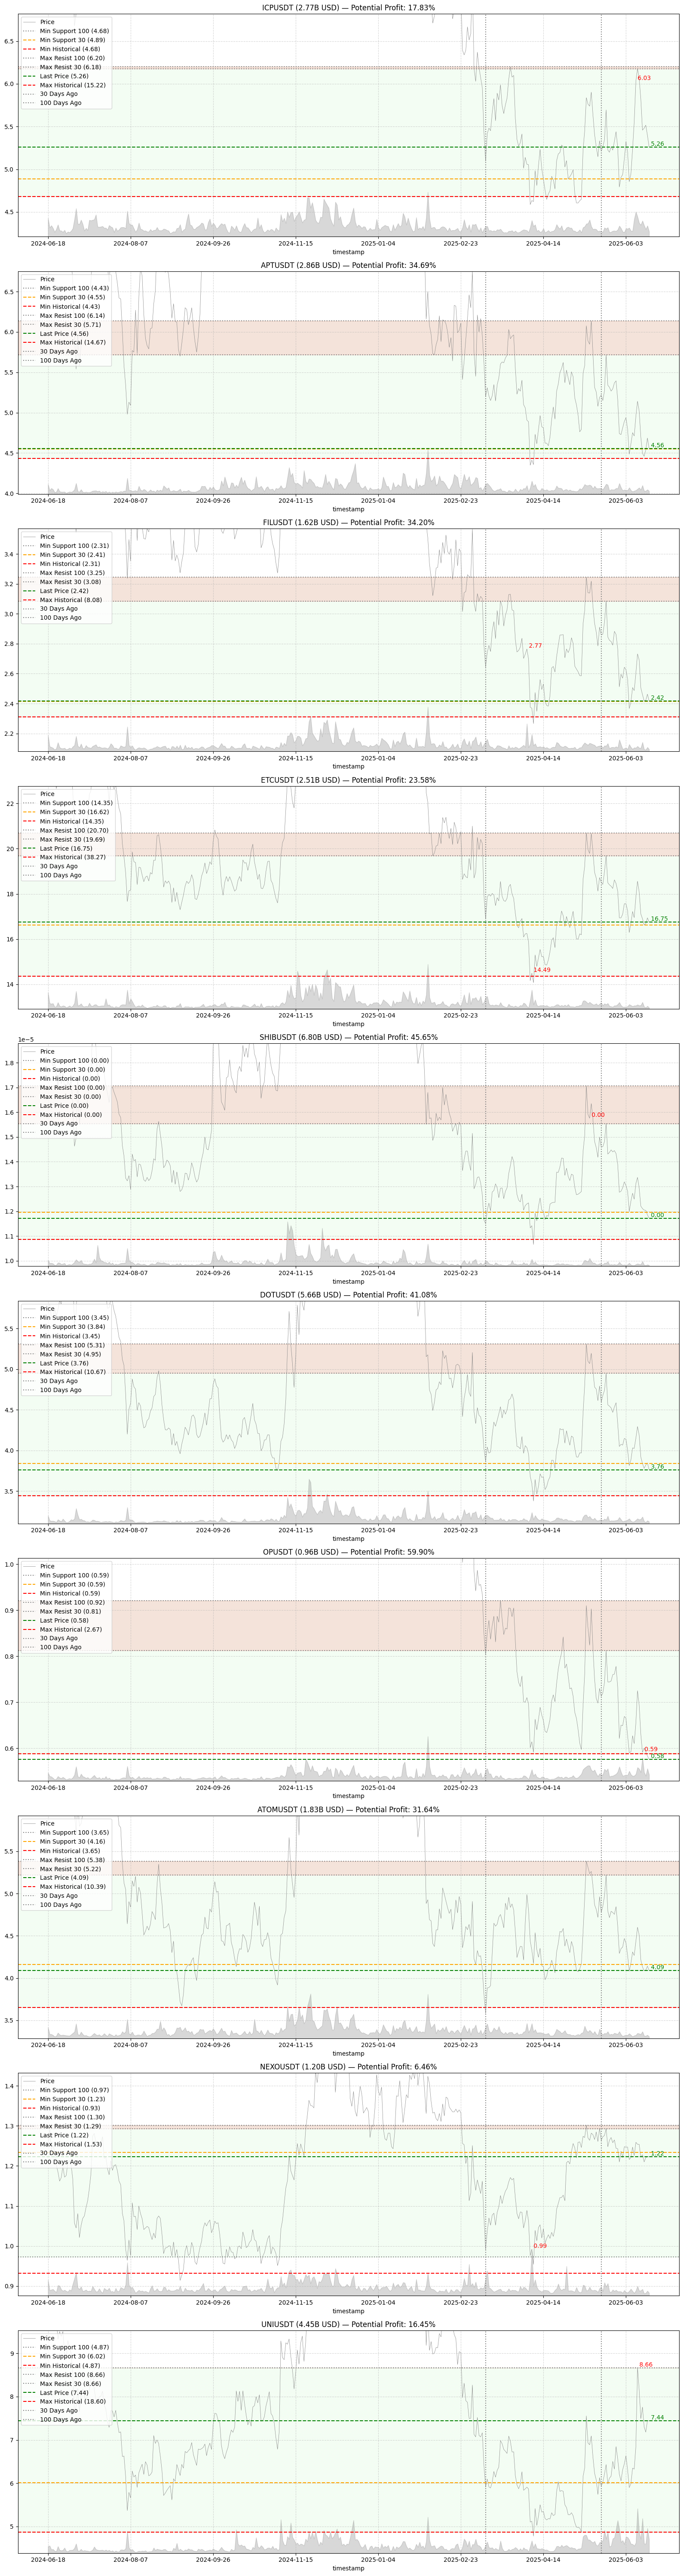

In [20]:
paint_result(df, result, optimal_symbol, cap_df, df_vol, last_days=365)

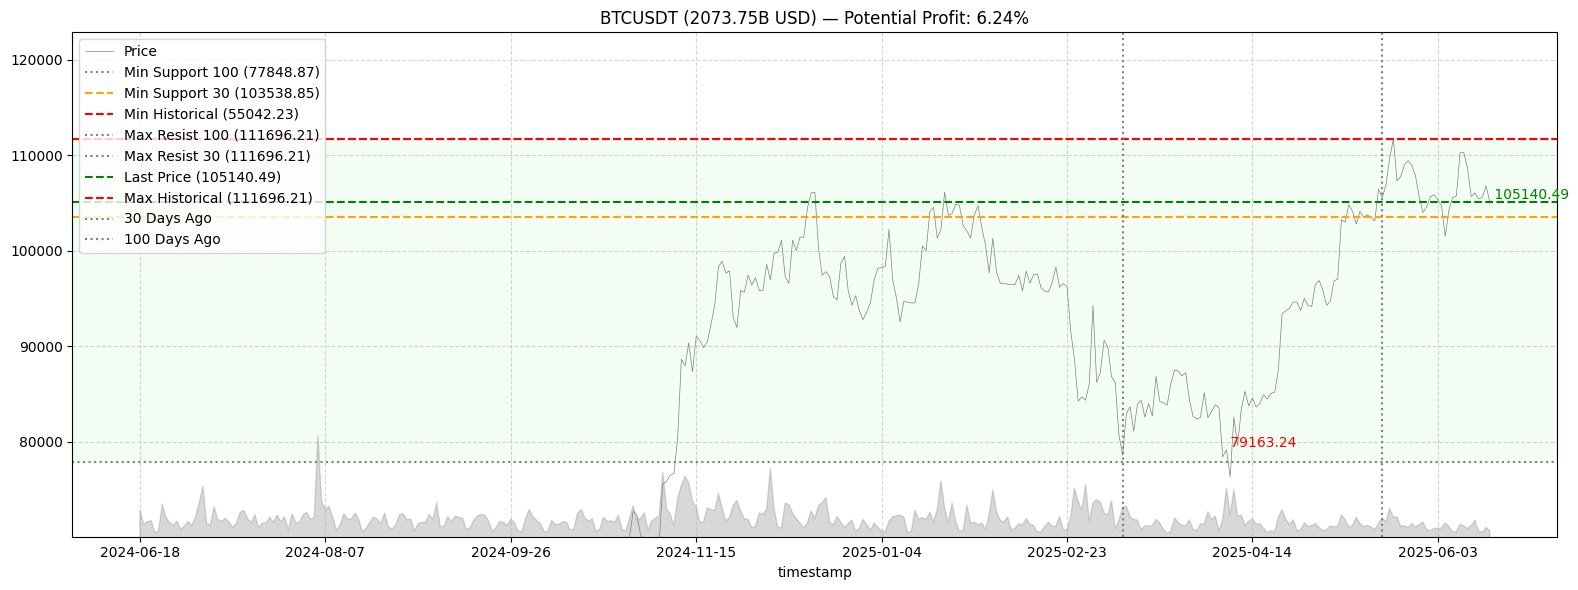

In [21]:
paint_result(df, ['BTCUSDT'], optimal_symbol, cap_df, df_vol, last_days=365)